### Hard-coded values

In [1]:
Vn = ['S','B','D','Q'] 
Vt = ['a','b','c','d']  
# Each  ith item P[i] represents a derivation from  Vn[i] ith. 
P = [  ['aB','bB'],'cD', ['dQ','a'], ['bB','dQ']  ] 

###### Importing the libs

In [2]:
import numpy as np   
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Generating the words

In [3]:
# A list of all 5 generated words
word_list = list()  

# A list of  dataframes (bascially derivations tables)
df_list = list()  

# A list of word that would be graphically represented below.
words_nx = list()


# for each 5 words
for j in range(5):
    
    # arr is for tuple that would be used in graphical representation
    arr = list() 
    # dataframe for derivation table
    df = pd.DataFrame() 
    
    # Initializing word with a random choise of the S  => example: either aB or bB
    word = P[0][np.random.randint(2)]  
    
    # Generating the actual word with some conditions
    while word.islower() == False:
        
        # parasing the Vn array
        for i in range(len(Vn)):
            
            # if the uppercase letter is found in the at the moment Word.
            if Vn[i] in word: 
                
                # P[1] has the length 1, so another approach is applied.
                if i == 1:
                    # previous word for tabular data.
                    prev_word = word  
                    
                    # Modfies the at the moment word with applied Productions Rule. 
                    word = word.replace(Vn[i],P[i])    
                    
                    # Some data needed for visual representation
                    df = df.append({f'prev_word{j+1}':prev_word,f'new_word{j+1}':word,'from' : Vn[i], 'to':P[i], 'space' : ' '}, ignore_index=True)  
                    arr.append( (prev_word, word)) 

                    break
                else: 
                    # Does the same thing as above for P[i] which has the lenght 2.
                    rand_i = np.random.randint(2) 
                    prev_word = word
                    word = word.replace(Vn[i],P[i][rand_i])  
                    df = df.append({f'prev_word{j+1}':prev_word,f'new_word{j+1}':word,'from' : Vn[i], 'to':P[i][rand_i],'space' :' '},ignore_index=True)  

                    arr.append( (prev_word, word)) 

                    break  
        
        # A conditions if the lenght of the generated word is less than  (Vn+2)= 6.
        if word.islower() == True and len(word) <6:
            word = P[0][np.random.randint(2)]  
            df = pd.DataFrame() 
            arr = list() 
            
     
    word_list.append(word)
    df_list.append(df)
    words_nx.append(arr) 
           
del word 
del arr 
del df

In [4]:
# Combining the data in a tabular form
result = pd.concat([ x for x in df_list], axis = 1) 
result = result.fillna(' ')

## Derivation tables

In [5]:
result.iloc[:,:15]

,prev_word1,new_word1,from,to,space,prev_word2,new_word2,from,to,space,prev_word3,new_word3,from,to,space
0,aB,acD,B,cD,,bB,bcD,B,cD,,aB,acD,B,cD,
1,acD,acdQ,D,dQ,,bcD,bcdQ,D,dQ,,acD,acdQ,D,dQ,
2,acdQ,acddQ,Q,dQ,,bcdQ,bcdbB,Q,bB,,acdQ,acdbB,Q,bB,
3,acddQ,acddbB,Q,bB,,bcdbB,bcdbcD,B,cD,,acdbB,acdbcD,B,cD,
4,acddbB,acddbcD,B,cD,,bcdbcD,bcdbca,D,a,,acdbcD,acdbcdQ,D,dQ,
5,acddbcD,acddbca,D,a,,,,,,,acdbcdQ,acdbcddQ,Q,dQ,
6,,,,,,,,,,,acdbcddQ,acdbcddbB,Q,bB,
7,,,,,,,,,,,acdbcddbB,acdbcddbcD,B,cD,
8,,,,,,,,,,,acdbcddbcD,acdbcddbcdQ,D,dQ,
9,,,,,,,,,,,acdbcddbcdQ,acdbcddbcdbB,Q,bB,


In [6]:
result.iloc[:,15:]

,prev_word4,new_word4,from,to,space,prev_word5,new_word5,from,to,space
0,bB,bcD,B,cD,,bB,bcD,B,cD,
1,bcD,bcdQ,D,dQ,,bcD,bcdQ,D,dQ,
2,bcdQ,bcddQ,Q,dQ,,bcdQ,bcddQ,Q,dQ,
3,bcddQ,bcdddQ,Q,dQ,,bcddQ,bcddbB,Q,bB,
4,bcdddQ,bcdddbB,Q,bB,,bcddbB,bcddbcD,B,cD,
5,bcdddbB,bcdddbcD,B,cD,,bcddbcD,bcddbca,D,a,
6,bcdddbcD,bcdddbcdQ,D,dQ,,,,,,
7,bcdddbcdQ,bcdddbcddQ,Q,dQ,,,,,,
8,bcdddbcddQ,bcdddbcddbB,Q,bB,,,,,,
9,bcdddbcddbB,bcdddbcddbcD,B,cD,,,,,,


# Oriented graphs for the generated words 
# The tree would look the same ( as  a diagonal)

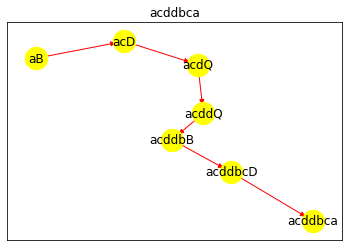

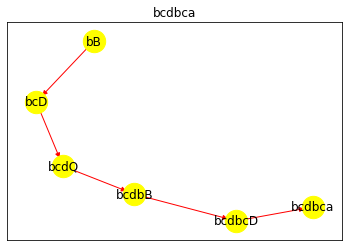

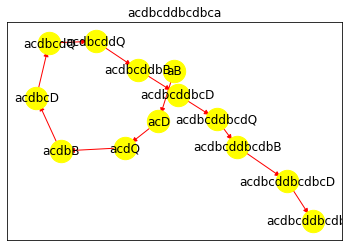

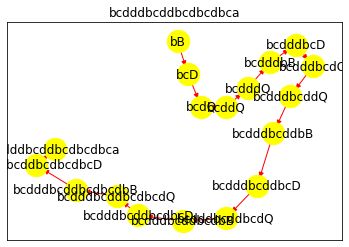

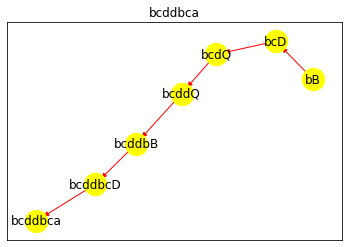

In [7]:
import networkx as nx
import matplotlib.pyplot as plt 

for i in range(5):
    G = nx.DiGraph()
    G.add_edges_from(words_nx[i])
    # Need to create a layout when doing
    # separate calls to draw nodes and edges
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                           node_color = 'yellow', node_size = 500)
    nx.draw_networkx_labels(G, pos) 

    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='r', arrows=True) 

    plt.title(word_list[i])
    plt.show() 

# Finite Automaton

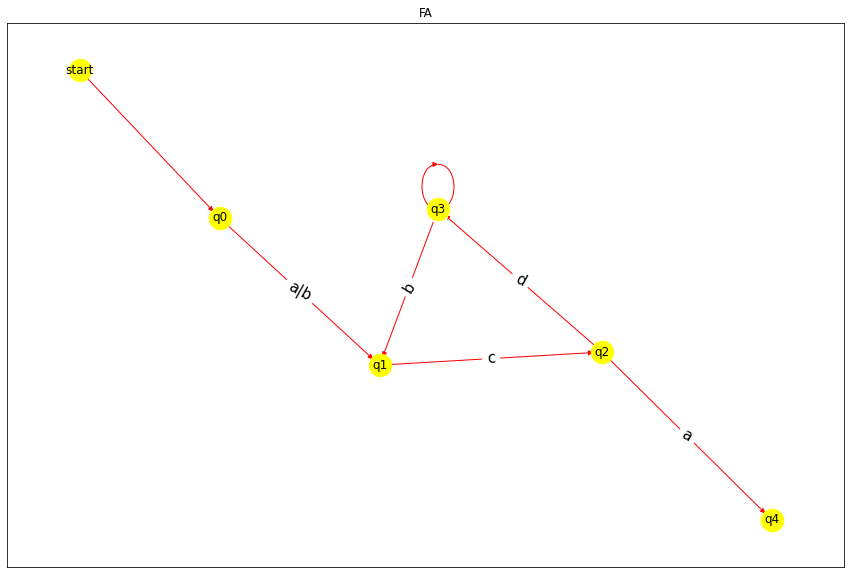

In [51]:
 
    

qs = [  ('start','q0'),
    ('q0','q1'), 
        ('q1','q2'), 
        ('q2','q3'), 
       ('q3','q1'), 
      ('q2','q4'), 
      ('q3', 'q3')
     ]


G = nx.DiGraph()
G.add_edges_from(qs)
# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = 'yellow', node_size = 500)  



labels = {('q0','q1'):'a|b', ('q1','q2'):'c',  ('q2','q3'):'d',  ('q3','q1') : 'b', ('q2','q4') : 'a', ('q3','q3'):'q'}

nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=15) 



nx.draw_networkx_labels(G, pos) 

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='r', arrows=True)  

plt.rcParams["figure.figsize"] = (15,10)
plt.title('FA')
plt.show()  

## Q3 = self-loop with Vt = q. 
## Q4 = final state